In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
#---------------------------------------
import logging
import warnings
logging.getLogger().setLevel(logging.ERROR)
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')


2025-04-18 02:48:26.477544: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-18 02:48:26.484601: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744922906.492862  929139 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744922906.495293  929139 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744922906.501778  929139 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

# Load Training Data

In [ ]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [ ]:
tr_df = train_df('/home/readinggroup/Desktop/K_venv/dl/MRI/Training')
tr_df

Class Path       Class
0     /home/readinggroup/Desktop/K_venv/dl/MRI/Train...  meningioma
1     /home/readinggroup/Desktop/K_venv/dl/MRI/Train...  meningioma
2     /home/readinggroup/Desktop/K_venv/dl/MRI/Train...  meningioma
3     /home/readinggroup/Desktop/K_venv/dl/MRI/Train...  meningioma
4     /home/readinggroup/Desktop/K_venv/dl/MRI/Train...  meningioma
...                                                 ...         ...
5707  /home/readinggroup/Desktop/K_venv/dl/MRI/Train...      glioma
5708  /home/readinggroup/Desktop/K_venv/dl/MRI/Train...      glioma
5709  /home/readinggroup/Desktop/K_venv/dl/MRI/Train...      glioma
5710  /home/readinggroup/Desktop/K_venv/dl/MRI/Train...      glioma
5711  /home/readinggroup/Desktop/K_venv/dl/MRI/Train...      glioma

[5712 rows x 2 columns]

# Load Test Data

In [ ]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [ ]:
ts_df = test_df('/home/readinggroup/Desktop/K_venv/dl/MRI/Testing')
ts_df

Class Path       Class
0     /home/readinggroup/Desktop/K_venv/dl/MRI/Testi...  meningioma
1     /home/readinggroup/Desktop/K_venv/dl/MRI/Testi...  meningioma
2     /home/readinggroup/Desktop/K_venv/dl/MRI/Testi...  meningioma
3     /home/readinggroup/Desktop/K_venv/dl/MRI/Testi...  meningioma
4     /home/readinggroup/Desktop/K_venv/dl/MRI/Testi...  meningioma
...                                                 ...         ...
1306  /home/readinggroup/Desktop/K_venv/dl/MRI/Testi...      glioma
1307  /home/readinggroup/Desktop/K_venv/dl/MRI/Testi...      glioma
1308  /home/readinggroup/Desktop/K_venv/dl/MRI/Testi...      glioma
1309  /home/readinggroup/Desktop/K_venv/dl/MRI/Testi...      glioma
1310  /home/readinggroup/Desktop/K_venv/dl/MRI/Testi...      glioma

[1311 rows x 2 columns]

# Number of images in each class in train data

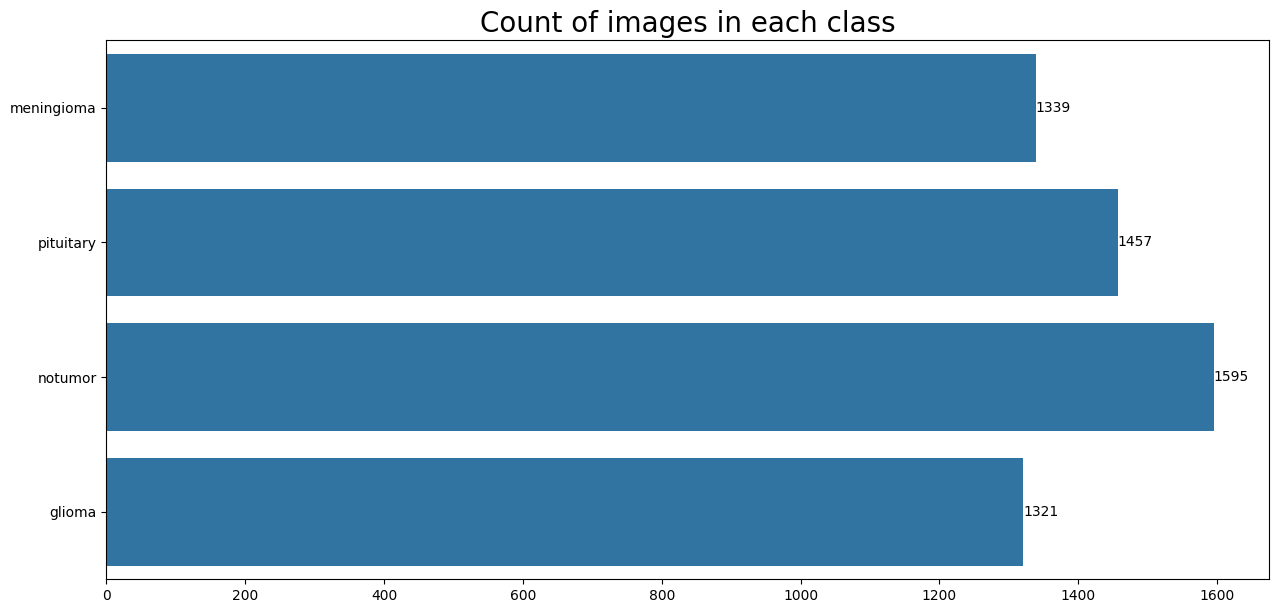

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

# Count each class in test data

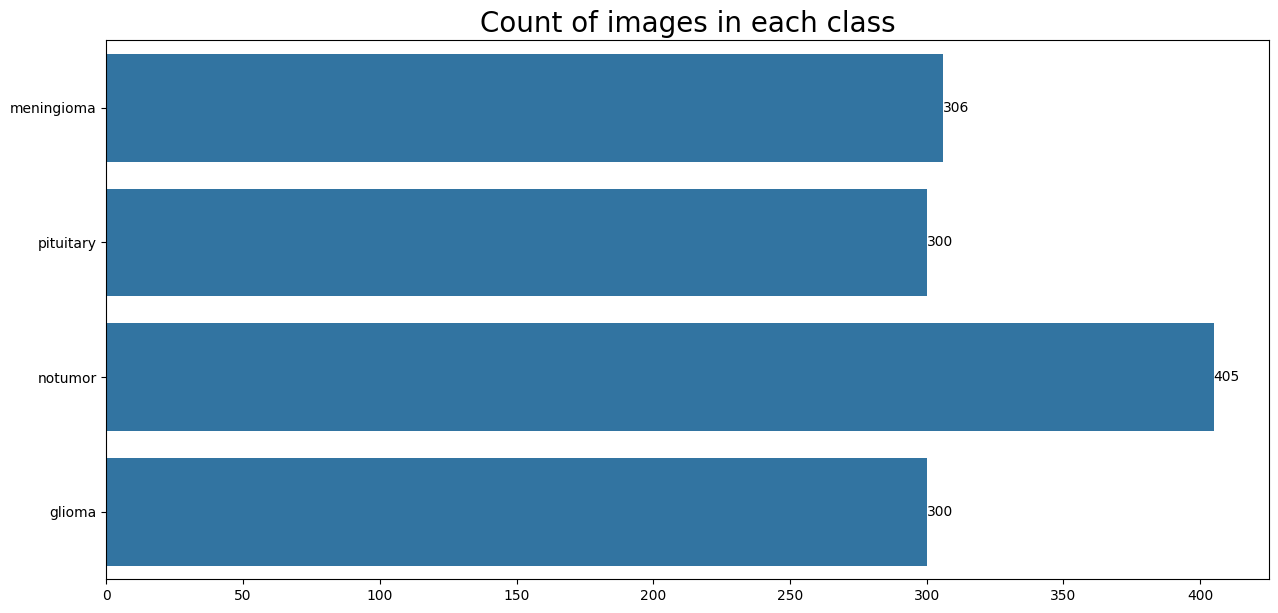

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df , y=ts_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

# Splitting dataset

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])
valid_df

Class Path       Class
1297  /home/readinggroup/Desktop/K_venv/dl/MRI/Testi...      glioma
18    /home/readinggroup/Desktop/K_venv/dl/MRI/Testi...  meningioma
367   /home/readinggroup/Desktop/K_venv/dl/MRI/Testi...   pituitary
73    /home/readinggroup/Desktop/K_venv/dl/MRI/Testi...  meningioma
1120  /home/readinggroup/Desktop/K_venv/dl/MRI/Testi...      glioma
...                                                 ...         ...
1070  /home/readinggroup/Desktop/K_venv/dl/MRI/Testi...      glioma
860   /home/readinggroup/Desktop/K_venv/dl/MRI/Testi...     notumor
1284  /home/readinggroup/Desktop/K_venv/dl/MRI/Testi...      glioma
194   /home/readinggroup/Desktop/K_venv/dl/MRI/Testi...  meningioma
932   /home/readinggroup/Desktop/K_venv/dl/MRI/Testi...     notumor

[655 rows x 2 columns]

# Data preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
img_size = (299, 299)
seed = 42


# Training Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=[0.85, 1.15],
    brightness_range=(0.75, 1.25),
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation/Test Augmentation
test_val_datagen = ImageDataGenerator(
    rescale=1./255

# Data Generators
tr_gen = train_datagen.flow_from_dataframe(
    dataframe=tr_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    seed=seed
)

valid_gen = test_val_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False,
    seed=seed
)

ts_gen = test_val_datagen.flow_from_dataframe(
    dataframe=ts_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=16,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False,
    seed=seed
)

print("Class indices:", tr_gen.class_indices)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.
Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


# Getting samples from data

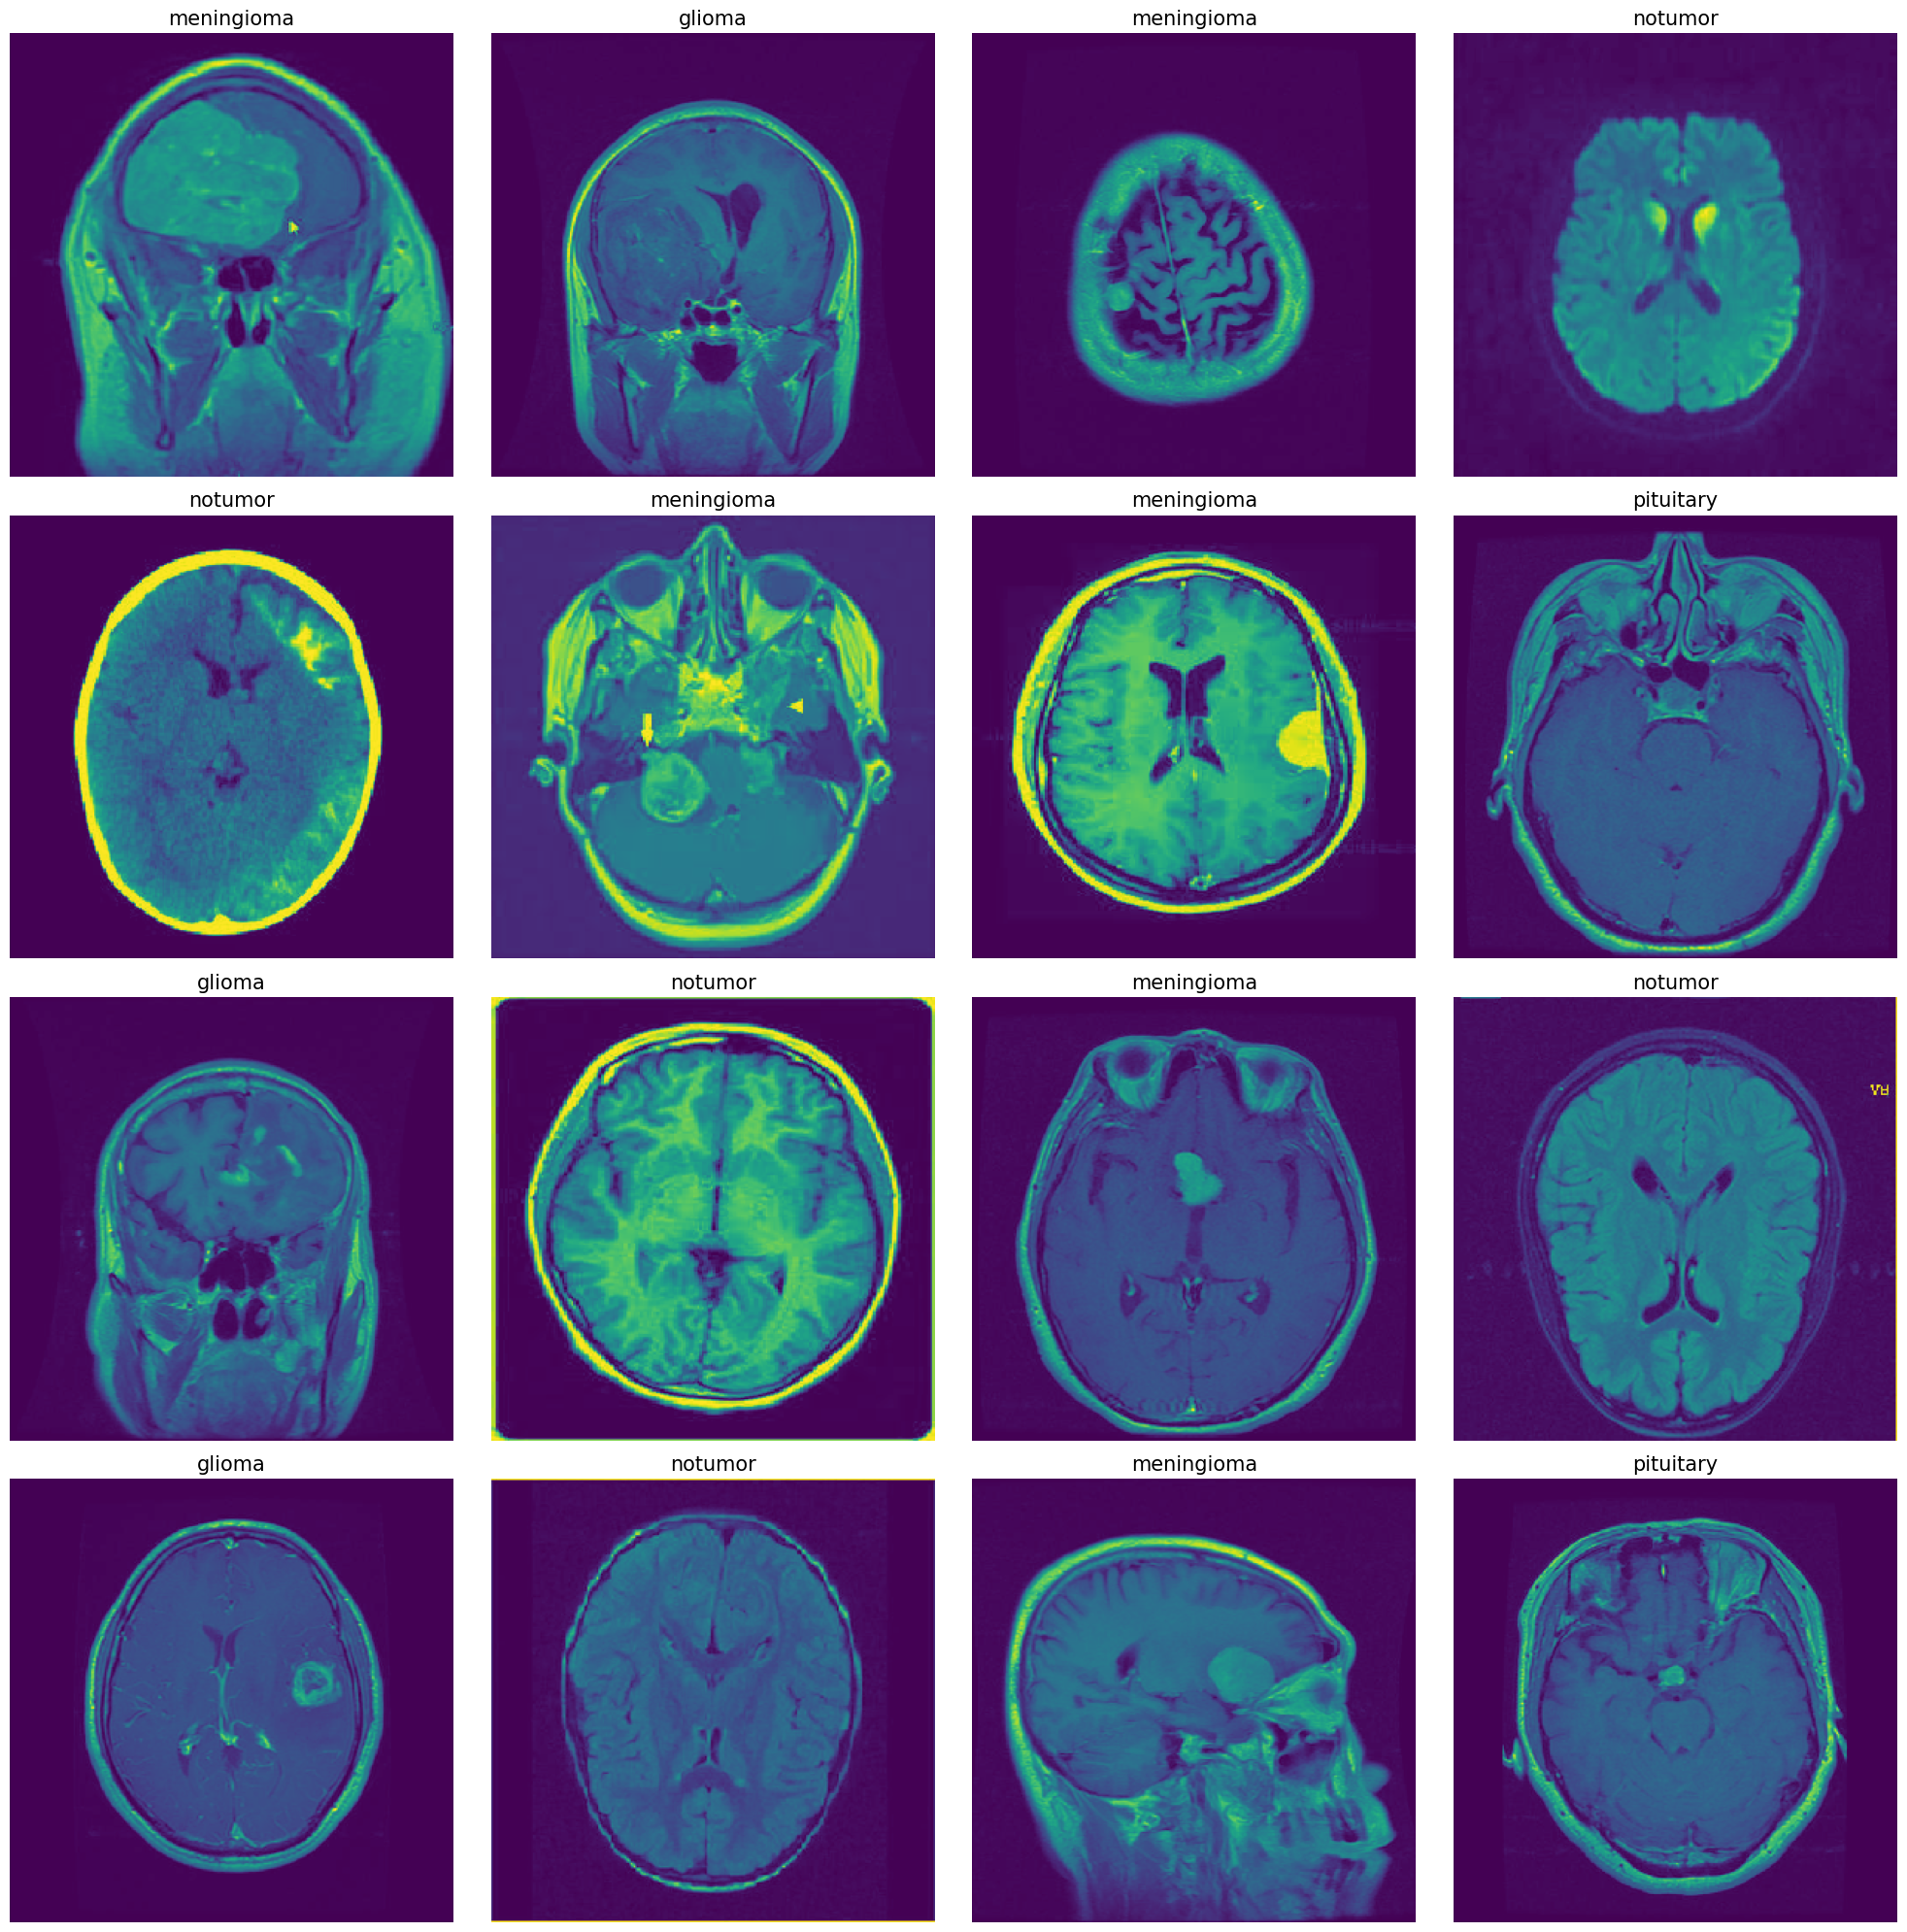

In [ ]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4, 4, i + 1)

    image_vis = (image + 1.0) / 2.0
    image_vis = np.clip(image_vis, 0, 1)

    plt.imshow(image_vis)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)
    plt.axis('off')

plt.tight_layout()
plt.show()


# Building the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.metrics import Precision, Recall

image_shape = (img_size[0], img_size[1], 1)
num_classes = 4

model = Sequential([
    Input(shape=image_shape),

    Conv2D(32, (3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    GlobalAveragePooling2D(),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

# Learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9
)

# Compile model
model.compile(
    optimizer=Adam(learning_rate=lr_schedule),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

model.summary()


I0000 00:00:1744922908.483318  929139 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 12506 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 299, 299, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 299, 299, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 299, 299, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 299, 299, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 149, 149, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 149, 149, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 149, 149, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 149, 149, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 74, 74, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 74, 74, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 74, 74, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 74, 74, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │             

 Total params: 323,300 (1.23 MB)

 Trainable params: 321,892 (1.23 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


# Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

hist = model.fit(tr_gen,
                 epochs=1000,
                 validation_data=valid_gen,
                 shuffle= False,
                 callbacks=[early_stopping, checkpoint])


Epoch 1/1000


I0000 00:00:1744922910.707676  929363 service.cc:152] XLA service 0x7401bc01db70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744922910.707693  929363 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9
2025-04-18 02:48:30.763387: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744922911.040276  929363 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-18 02:48:32.314709: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3719', 4 bytes spill stores, 4 bytes spill loads

2025-04-18 02:48:32.350795: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4278', 

  2/179 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.3438 - loss: 1.7528 - precision: 0.3368 - recall: 0.1875 

I0000 00:00:1744922919.991970  929363 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5637 - loss: 1.1311 - precision: 0.6168 - recall: 0.4858

2025-04-18 02:49:02.771125: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_269', 8 bytes spill stores, 8 bytes spill loads



179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 134ms/step - accuracy: 0.5639 - loss: 1.1304 - precision: 0.6170 - recall: 0.4861 - val_accuracy: 0.2885 - val_loss: 1.3716 - val_precision: 0.8000 - val_recall: 0.0061
Epoch 2/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.6842 - loss: 0.7983 - precision: 0.7264 - recall: 0.6178 - val_accuracy: 0.3023 - val_loss: 3.9608 - val_precision: 0.3003 - val_recall: 0.2962
Epoch 3/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.7389 - loss: 0.6792 - precision: 0.7712 - recall: 0.6995 - val_accuracy: 0.3038 - val_loss: 5.3792 - val_precision: 0.3038 - val_recall: 0.3038
Epoch 4/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.7619 - loss: 0.6286 - precision: 0.7927 - recall: 0.7260 - val_accuracy: 0.4046 - val_loss: 1.9902 - val_precision: 0.4176 - val_recall: 0.3985
Epoch 5/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.8162 - loss: 0.4987 - precision: 0.8399 - recall: 0.7856 - val_accuracy: 0.3191 - val_

# Visualize model performance

In [ ]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])

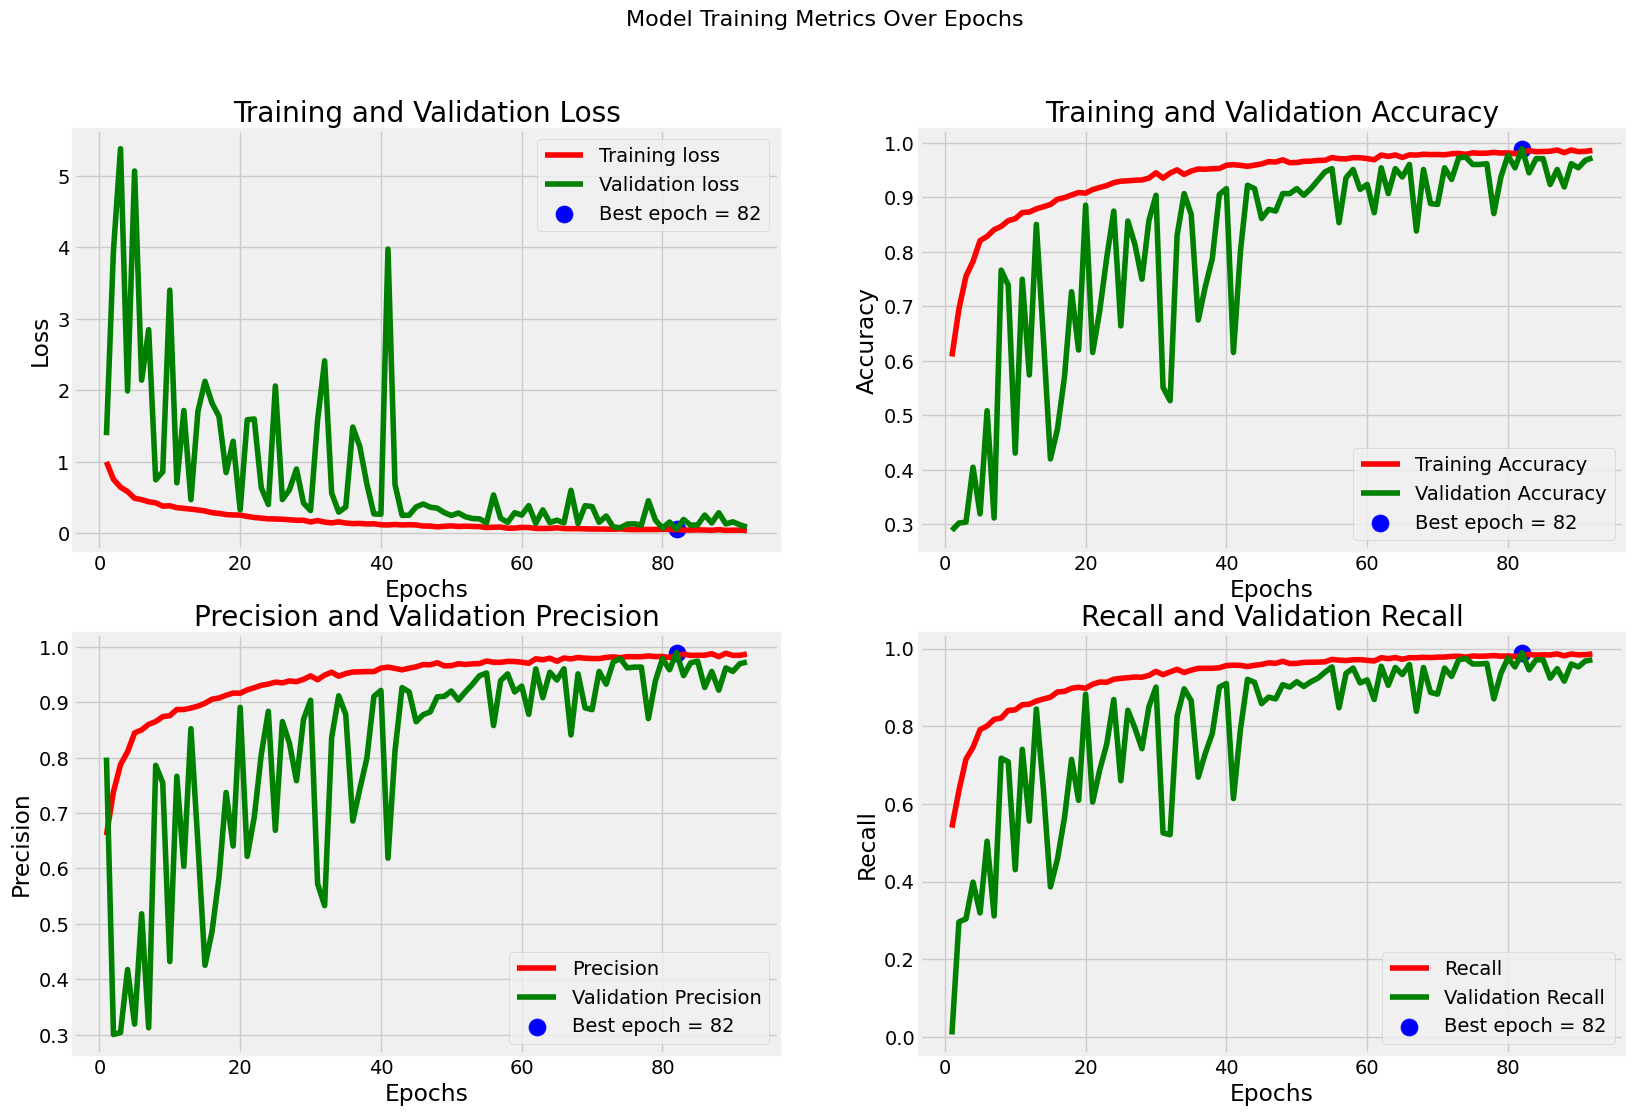

In [ ]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


# Model Evaluation

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

print(test_score)

179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.9856 - loss: 0.0413 - precision: 0.9868 - recall: 0.9851
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9949 - loss: 0.0420 - precision: 0.9949 - recall: 0.9949
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9893 - loss: 0.0285 - precision: 0.9893 - recall: 0.9893
Train Loss: 0.0447
Train Accuracy: 98.46%
--------------------
Validation Loss: 0.0563
Validation Accuracy: 98.93%
--------------------
Test Loss: 0.0342
Test Accuracy: 98.48%
[0.03415483981370926, 0.9847561120986938, 0.9847561120986938, 0.9847561120986938]


In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


# Confusion matrix

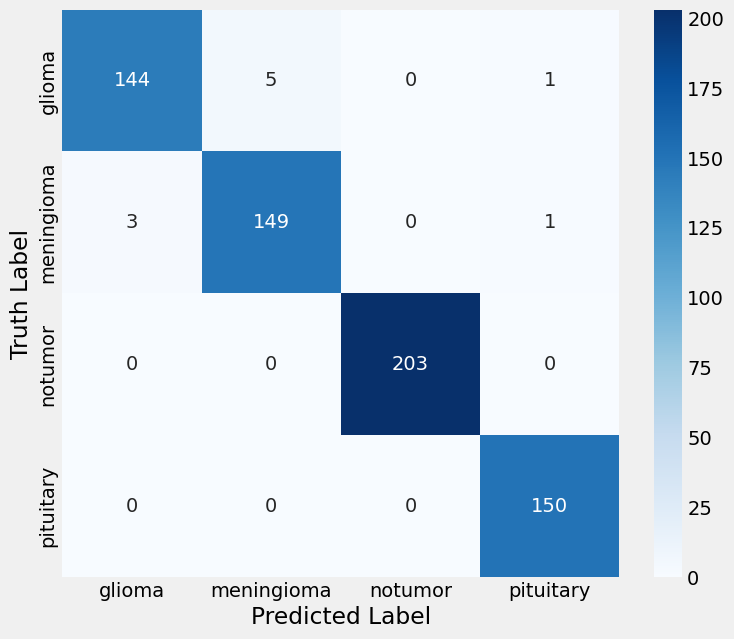

In [ ]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

# Classification report

In [ ]:
report = classification_report(ts_gen.classes, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       150
           1       0.97      0.97      0.97       153
           2       1.00      1.00      1.00       203
           3       0.99      1.00      0.99       150

    accuracy                           0.98       656
   macro avg       0.98      0.98      0.98       656
weighted avg       0.98      0.98      0.98       656



# Testing

In [ ]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image

    # Labels from the training generator
    labels = list(tr_gen.class_indices.keys())

    # Load and preprocess grayscale image
    gray_img = Image.open(img_path).convert('L')
    gray_img = gray_img.resize((299, 299))

    img_array = np.array(gray_img) / 255.0
    img_array = np.expand_dims(img_array, axis=-1)
    img_array = np.expand_dims(img_array, axis=0)

    # Debug print
    print("Model input shape:", img_array.shape)

    # Prediction
    predictions = model.predict(img_array)
    probs = list(predictions[0])

    # Load original image
    rgb_img = Image.open(img_path).convert('RGB')
    rgb_img = rgb_img.resize((299, 299))

    # Plotting
    plt.figure(figsize=(12, 12))

    plt.subplot(2, 1, 1)
    plt.imshow(rgb_img)
    plt.axis('off')
    plt.title("Input Image (Displayed in RGB)")

    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs, color='skyblue')
    plt.xlabel('Probability', fontsize=15)
    plt.title("Class Probabilities")
    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')
    plt.tight_layout()
    plt.show()


Model input shape: (1, 299, 299, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


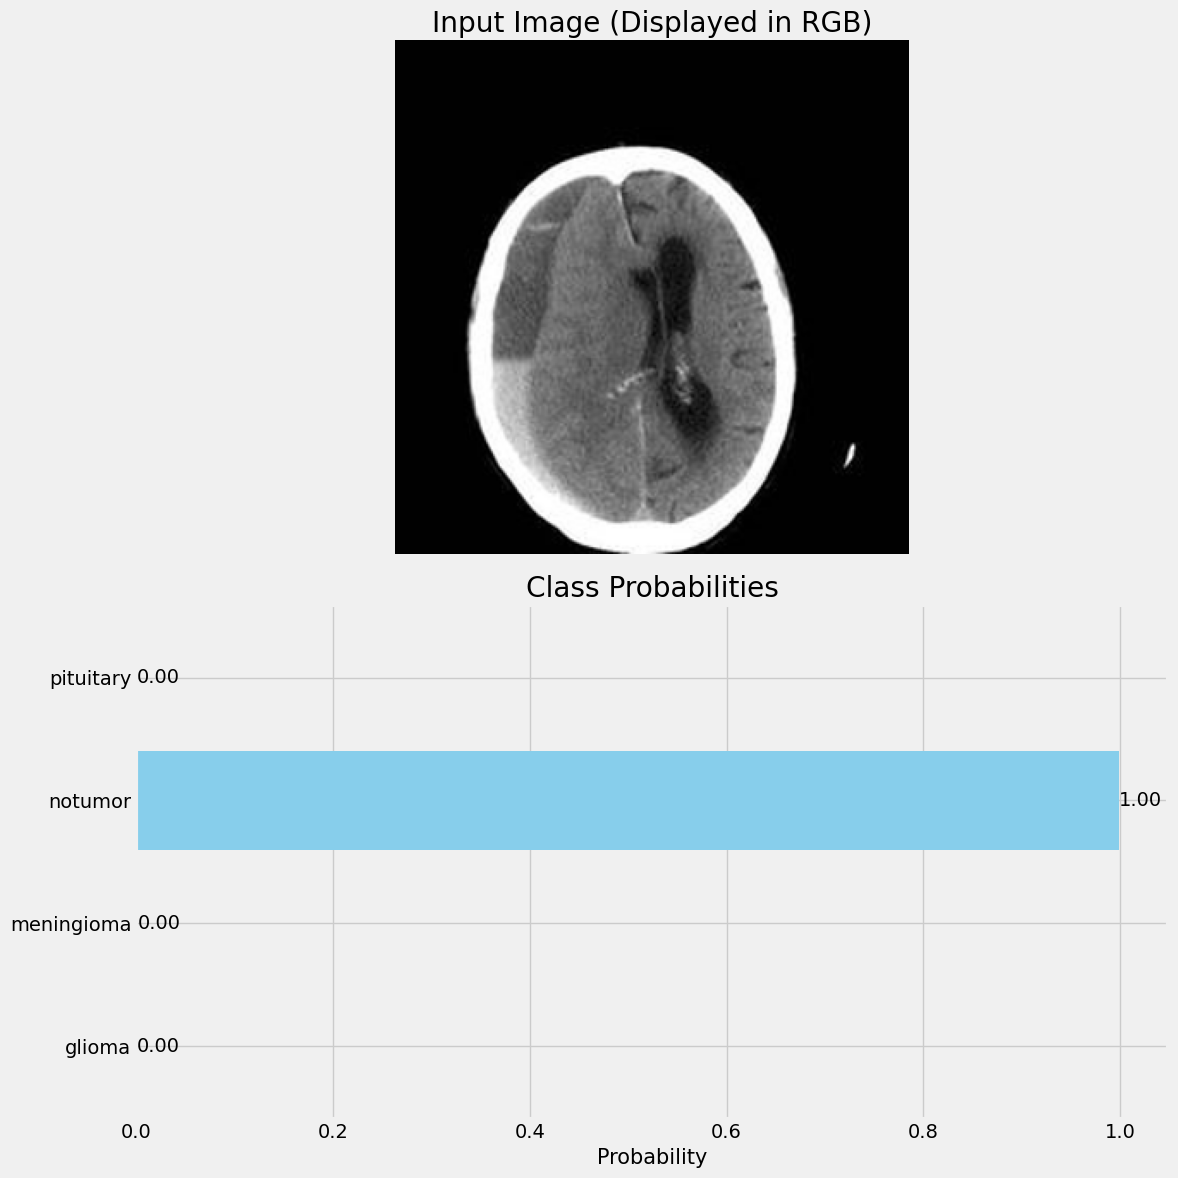

In [ ]:
predict('/home/readinggroup/Desktop/K_venv/dl/MRI/Testing/notumor/Te-noTr_0000.jpg')

Model input shape: (1, 299, 299, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


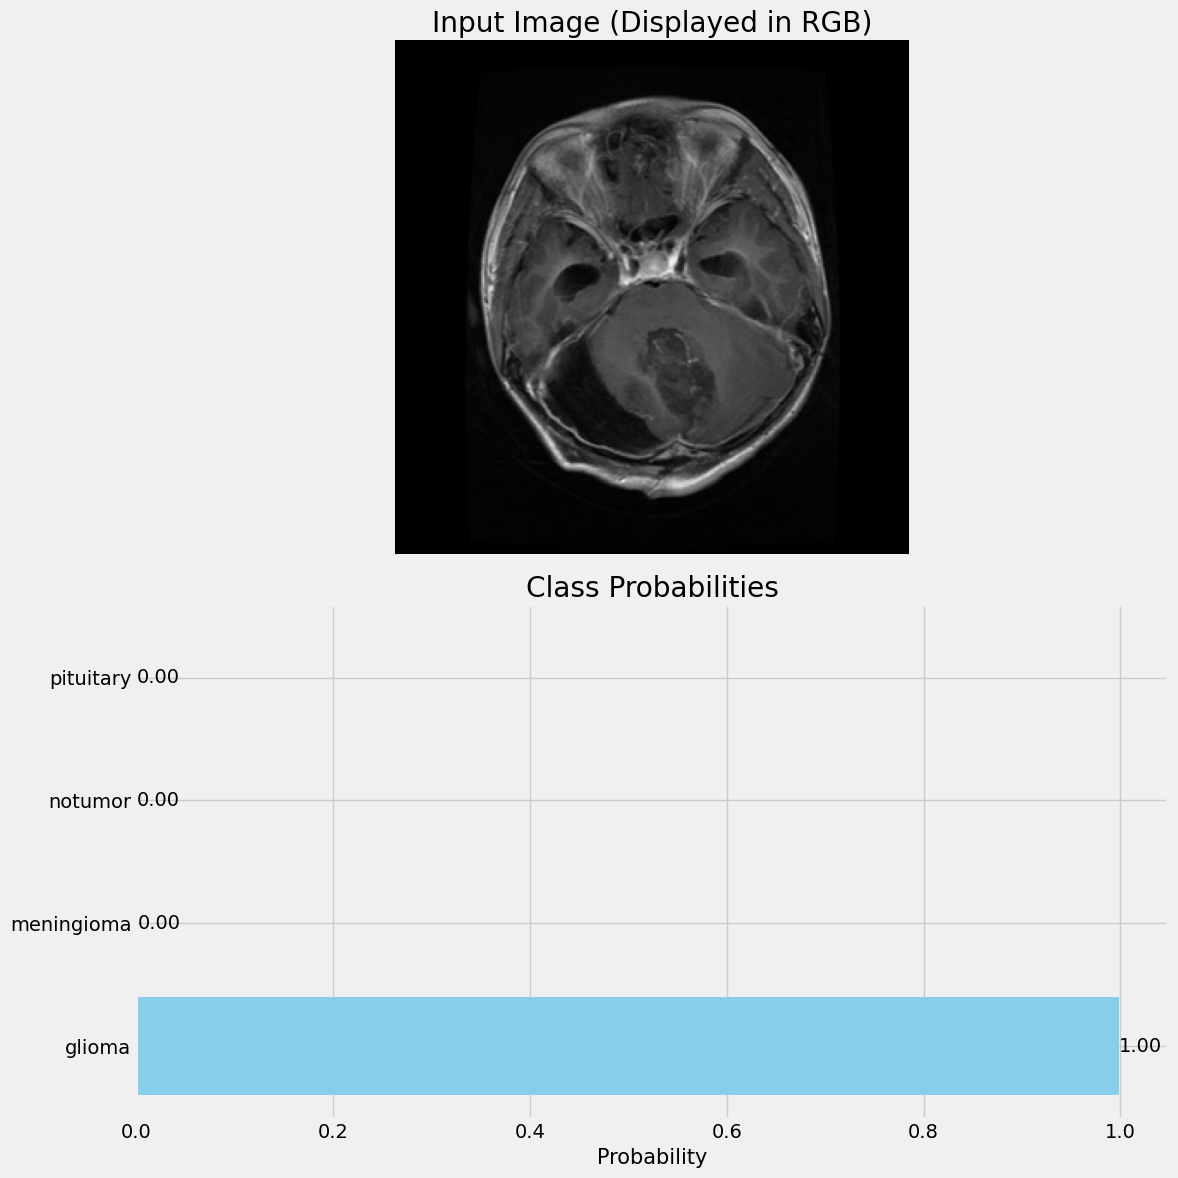

In [ ]:
predict('/home/readinggroup/Desktop/K_venv/dl/MRI/Testing/glioma/Te-glTr_0000.jpg')

Model input shape: (1, 299, 299, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


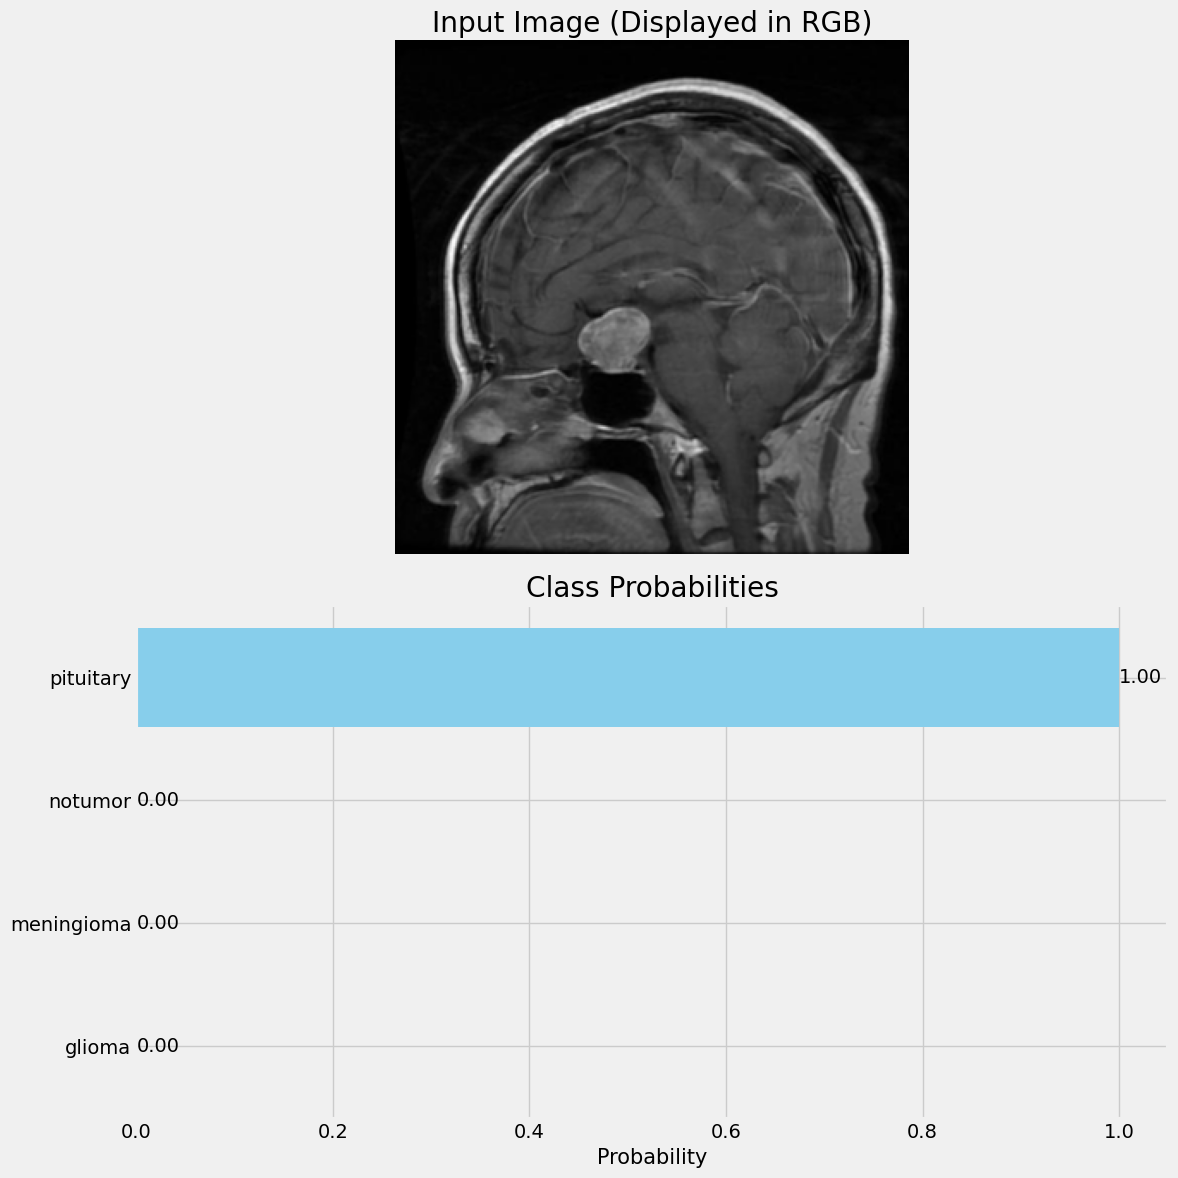

In [ ]:
predict('/home/readinggroup/Desktop/K_venv/dl/MRI/Testing/pituitary/Te-piTr_0008.jpg')

# LIME on preprocessed data

  0%|          | 0/1000 [00:00<?, ?it/s]

2025-04-18 03:11:18.371431: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_201', 8 bytes spill stores, 8 bytes spill loads



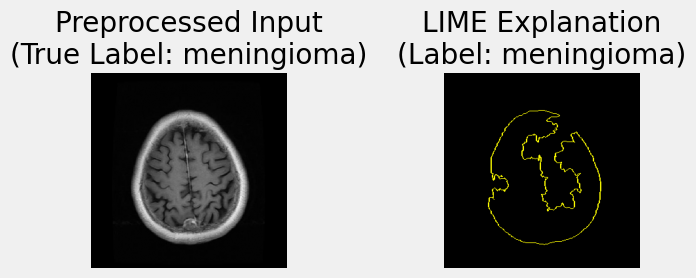

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.color import gray2rgb
from skimage.segmentation import mark_boundaries


# Model Prediction
def predict_fn(images):
    gray_images = np.mean(images, axis=-1, keepdims=True).astype(np.float32)
    return model.predict(gray_images, verbose=0)

# Get Test Image
x_batch, y_batch = next(ts_gen)
idx = 0  # change this to pick a different image

gray_image = x_batch[idx]
true_label = np.argmax(y_batch[idx])
image_rgb = gray2rgb(np.squeeze(gray_image))


# LIME Explanation
explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(
    image_rgb,
    classifier_fn=predict_fn,
    top_labels=5,
    hide_color=0,
    num_samples=1000
)

# Choose label to explain
if true_label in explanation.top_labels:
    label_to_show = true_label
else:
    label_to_show = explanation.top_labels[0]

# Get highlighted regions
temp, mask = explanation.get_image_and_mask(
    label_to_show,
    positive_only=True,
    num_features=10,
    hide_rest=False
)
class_names = {v: k for k, v in tr_gen.class_indices.items()}

# Side-by-Side Plot
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# Original preprocessed grayscale image
axes[0].imshow(gray_image.squeeze(), cmap='gray')
axes[0].set_title(f"Preprocessed Input\n(True Label: {class_names[true_label]})")
axes[0].axis('off')

# LIME explanation
axes[1].imshow(mark_boundaries(temp / 255.0, mask))
axes[1].set_title(f"LIME Explanation\n(Label: {class_names[label_to_show]})")
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from numba import cuda
device = cuda.get_current_device()
device.reset()